# Laboratorium 9

### 0. Wczytanie danych
Używając metody `load_svmlight_file` z modułu `sklearn` załaduj plik `lab13_files/breast_cancer`, który składa się z 2 elementów: macierzy `X` o wymiarach `683 x 10` oraz wektora `y` o dlugosci `683`. Macierz `X` opisuje badania 683 pacjentow, a wektor `y` ich diagnozy. 

In [1]:
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file('lab13_files/breast-cancer')
X = X.toarray()

### 1. Preprocessing
1.1 Korzystajac z `numpy.where` przenumeruj wektor y, tzn zamień wartości 2 i 4 na -1 i +1. 

1.2 Przeskaluj macierz X, tak żeby wartości w każdej kolumnie mieściły się w zakresie [0,1], innymi słowy przeskaluj niezależnie każdą kolumne $X_j$ wg wzoru:


$$
X_j = \frac{X_j-\min(X_j)}{\max(X_j)-\min(X_j)}
$$

In [2]:
import numpy as np

y = np.where(y == 2, -1, 1)
X = (X - np.min(X, axis=0))/(np.max(X, axis=0) - np.min(X, axis=0))

### 2. Wizualizacja
Narysuj dane używajac biblioteki `matplotlib`. Użyj wymiarów 1 i 2 z macierzy X, a jako kolory użyj wektora y. Pobaw sie parametrami "s" oraz "alpha" metody `plt.scatter` żeby uzyskać czytelną wizualizacje, np. taką jak poniżej.

<img src="lab13_files/d.png">

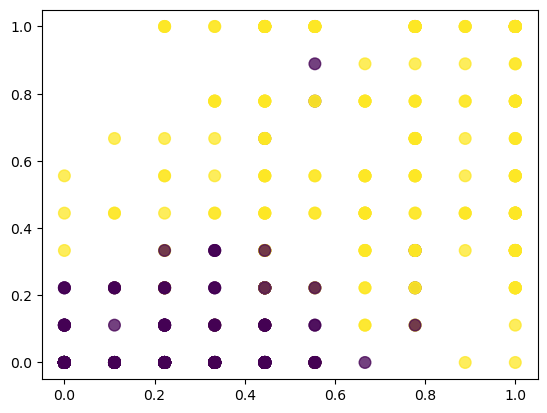

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 1], X[:, 2], s=70, c=y, alpha=0.75)

### 3. Regresja 

Przeprowadź regresje liniową wg wzoru:
$$
\beta = (X^TX)^{-1}X^Ty
$$

In [4]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta)

[-6.99534089 -0.18099245  0.98590886  0.42019705  0.10457698 -0.59830206
  0.85739125 -0.31840576  0.47729336  0.16637872]


### 4. Wizualizacja Regresji

Zwizualizuj dane po zrzutowaniu na $\beta$ używajac metody `plt.hist`, tzn. narysuj histogramy $\beta X_+$ oraz
$\beta X_-$ gdzie $X_+$ to wiersze $X$ dla których $y=+1$ i analogicznie $X_-$. Postaraj się wygenerować czytelny wykres podobny do tego poniżej.

<img src="lab13_files/lr1.png">

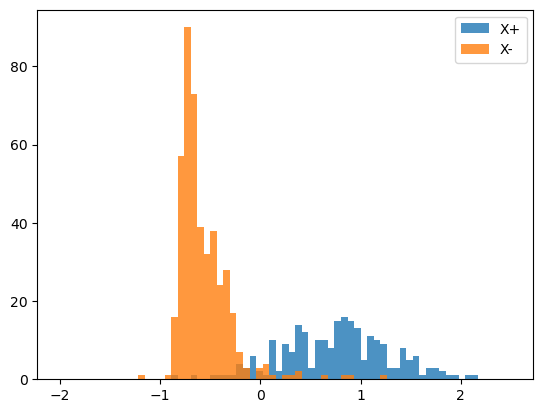

In [5]:
X_plus = [a for a in range(len(y)) if y[a] == 1]
X_minus = [a for a in range(len(y)) if y[a] == -1]
bins = np.linspace(-2., 2.5, 70)

plt.hist(X[X_plus] @ beta, bins, alpha=0.8, label='X+')
plt.hist(X[X_minus] @ beta, bins, alpha=0.8, label='X-')
plt.legend(loc='upper right')
plt.show()

### 5. Klasyfikacja

Przeprowadź "klasyfikacje" naszych pacjentów, ci, którzy zostali zrzutowani na wartość ujemną dostają etykiete $-1$, a ci którzy na wartość dodatnia - etykiete $+1$

In [6]:
np.where(beta @ X.T < 0, -1, 1)

array([-1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
        1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
       -1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,
        1, -1,  1,  1,  1

### 6. Ewaluacja

Policz jak dokładny jest ten model, tzn. jak duży jest zbiór
$ \{ (x_i,y_i) : \mathrm{sign}(\beta x_i) = y_i \} $
w stosunku do rozmiaru całego $y$

Powinno udać się uzyskać wynik na poziomie 93-94%

In [7]:
print(len([(X[a], y[a]) for a in range(len(y)) if np.sign(X[a] @ beta) == np.sign(y[a])])/len(y))
c = 0.1
beta2 = np.linalg.inv(X.T @ X + np.identity(10) * (1/c)) @ X.T @ y
print(beta2)

0.9487554904831625
[-1.71084892 -0.58961643  0.81365972  0.49078776  0.17972236 -0.6784908
  0.82772892 -0.45884221  0.49088186  0.21183204]


### 7. Regularyzacja 
Dodaj parametr `C` do regresji liniowej
$$
\beta = (X^TX + \tfrac{1}{C}I)^{-1}X^Ty
$$

gdzie $I$ - macierz identyczności. 

Dla jakiej wartości `C` wynik jest najlepszy? Jaki wynik udało Ci sie uzyskać?

### 8. Gratulacje
Właśnie stworzyłeś/-aś swój pierwszy klasyfikator (statystyczny model predykcji). 

Spróbuj zastosować go do innych danych.

In [8]:
import numpy as np
from scipy.optimize import minimize

class LRClassifier:
    def __init__(self, C, scale=True):
        self.C = C
        self.scale = scale
        self.beta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, beta, X, y, C):
        m = len(y)
        h = self.sigmoid(X.dot(beta))
        J = -1/m * (np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) - 0.5 * C * np.sum(beta[1:]**2))
        return J

    def gradient(self, beta, X, y, C):
        m = len(y)
        h = self.sigmoid(X.dot(beta))
        grad = 1/m * (X.T.dot(h - y) + np.concatenate(([0], C * beta[1:])))
        return grad
    
    def normalize(self, X):
        mins = np.min(X, axis=0)
        maxs = np.max(X, axis=0)
        return (X - mins) / (maxs - mins)

    def fit(self, X, y):
        if self.scale:
            X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        initial_beta = np.zeros(X.shape[1])
        result = minimize(self.cost_function, initial_beta, args=(X, (y == np.unique(y)[1]).astype(int), self.C),
                          jac=self.gradient, method='BFGS')
        self.beta = result.x

    def predict(self, X):
        if self.scale:
            X = self.normalize(X)
        
        X = np.insert(X, 0, 1, axis=1)
        predictions = []
        
        for row in X:
            prediction = 'Y' if self.sigmoid(np.dot(row, self.beta)) < 0.5 else 'X'
            predictions.append(prediction)
        
        return np.array(predictions)


### Zadanie dodatkowe

Zaimplementuj powyższą metode jako klase `LRClassifier` wyposażoną w następujące metody:

* konstruktor przyjmujący dwa parametry: 
    * `C` - stała z równania 
    * `scale` - zmienna boolowska (domyslnie `True`) która określa czy macierz `X` ma byc automatycznie znormalizowana (przeskalowana do `[0,1]`)
* `.fit(X, y)` która spowoduje obliczenie $\beta$, dla `X` - dowolnej macierzy, `y` - wektora etykiet skladajacego sie z dwóch unikalnych wartosci (mogą to byc np. 2 różne stringi)
* `.predict(X)`, która zwróci wektor zawierajacy na `i`tej pozycji etykiete "przewidzianą" przez nasz model (pamiętaj o skalowaniu jesli `scale==True`!)

Przykladowe użycie:

    clf = LRClassifier(C=100)
    Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
    yt = np.array(['x', 'x', 'y', 'y', 'y'])
    clf.fit(Xt, yt)
    X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
    print(clf.predict(X)) # ['x', 'x', 'y']

In [9]:
# Przykładowe użycie
clf = LRClassifier(C=100)
Xt = np.array([[1, 6], [5, 2], [9, 3], [8, 4]])
yt = np.array(['x', 'y', 'y', 'y'])
clf.fit(Xt, yt)
X = np.array([[1, -4], [3, 0.9], [8, 2.1]])
print(clf.predict(X))  # ['x', 'x', 'x']

['X' 'X' 'X']
